In [9]:
import time
import os
import torch

from IPython.core.display_functions import display
from PIL import Image

import numpy as np
import cv2 as cv
import pandas as pd
from torchvision.transforms import PILToTensor
from IPython.display import clear_output

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
base = "../Datasets/WeedMap/0_rotations_processed_003_test/RedEdge/000/tile"
img_name = "frame0046_0.png"
channels = ["R", "G", "B", "NIR", "RE"]
img_channels = [np.array(Image.open(os.path.join(base, c, img_name))) for c in channels]

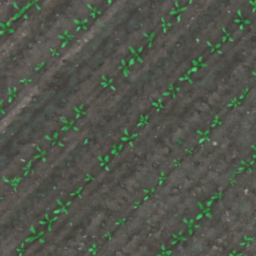

In [11]:
img = np.stack(img_channels)
Image.fromarray(np.stack(img_channels[:3]).transpose(1, 2, 0))

In [12]:
t = torch.from_numpy(img).float() / 255

# CropRowDetector

In [13]:
from detector import ModifiedHoughCropRowDetector, SplitLawinVegetationDetector, HoughCropRowDetector, get_medians
from PIL import Image
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import torch
import math
import numpy as np
import pandas as pd
import cv2 as cv

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
def get_drawn_img(img, theta_rho):
    draw_img = np.array(img[:3].transpose(1, 2, 0)).copy()
    for i in range(0, len(theta_rho)):
        rho = theta_rho[i][0]
        theta = theta_rho[i][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(draw_img, pt1, pt2, (255,255,255), 1, cv.LINE_AA)
    return draw_img

In [16]:
segmentor = SplitLawinVegetationDetector()

Some weights of the model checkpoint at nvidia/segformer-b1-finetuned-ade-512-512 were not used when initializing SegformerModel: ['decode_head.linear_c.0.proj.bias', 'decode_head.batch_norm.bias', 'decode_head.linear_c.3.proj.weight', 'decode_head.classifier.weight', 'decode_head.linear_c.3.proj.bias', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_fuse.weight', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.2.proj.weight', 'decode_head.classifier.bias', 'decode_head.linear_c.2.proj.bias', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.linear_c.1.proj.bias', 'decode_head.batch_norm.running_var', 'decode_head.batch_norm.weight', 'decode_head.batch_norm.running_mean']
- This IS expected if you are initializing SegformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Segforme

In [17]:
crd = HoughCropRowDetector(crop_detector=segmentor, threshold=50)

In [22]:
lines, components = crd.predict(t, return_components=True)

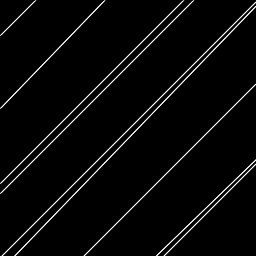

In [27]:
blank = np.zeros_like(img)
drawn = get_drawn_img(blank, lines)
Image.fromarray(drawn)

In [33]:
drawn = torch.tensor(drawn).cuda()
print(components.shape, drawn.shape)
crops_and = components & drawn
Image.fromarray(crops_and.cpu().numpy())

torch.Size([255, 256]) torch.Size([256, 256, 3])


RuntimeError: The size of tensor a (256) must match the size of tensor b (3) at non-singleton dimension 2

### Try Detector

In [1]:
import os
import torch

from IPython.core.display_functions import display
from PIL import Image

import numpy as np
import cv2 as cv
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

from detector import ModifiedHoughCropRowDetector, SplitLawinVegetationDetector, HoughCropRowDetector, get_medians
from PIL import Image
import math


%load_ext autoreload
%autoreload 2

redirects -WARNING- NOTE: Redirects are currently not supported in Windows or MacOs.
callbacks -WARNING- Failed to import deci_lab_client
deci_platform_sg_logger -WARNING- Failed to import deci_lab_client


c:\Users\pasqu\Desktop\Pasquale\Progetti\PHD\SSL-PA\venv\lib\site-packages\_distutils_hack\__init__.py:36: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


quantization_utils -WARNING- Failed to import pytorch_quantization
env_sanity_check -INFO- ** A sanity check is done when importing super_gradients for the first time. **
-> You can see the details by setting the env variable DISPLAY_SANITY_CHECK=True prior to import.


In [2]:
def get_drawn_img(img, theta_rho):
    draw_img = np.array(img[:3].transpose(1, 2, 0)).copy()
    for i in range(0, len(theta_rho)):
        rho = theta_rho[i][0]
        theta = theta_rho[i][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(draw_img, pt1, pt2, (0,0,255), 1, cv.LINE_AA)
    return Image.fromarray(draw_img)

In [3]:
base = "../Datasets/WeedMap/0_rotations_processed_003_test/RedEdge/000/tile"
channels = ["R", "G", "B", "NIR", "RE"]
files = os.listdir(os.path.join(base, channels[0]))

In [4]:
print(len(files))

468


In [5]:
subset = files[:100]

In [6]:
segmentor = SplitLawinVegetationDetector()
crd = HoughCropRowDetector(crop_detector=segmentor, threshold=75)

Some weights of the model checkpoint at nvidia/segformer-b1-finetuned-ade-512-512 were not used when initializing SegformerModel: ['decode_head.linear_c.0.proj.bias', 'decode_head.batch_norm.bias', 'decode_head.linear_c.3.proj.weight', 'decode_head.classifier.weight', 'decode_head.linear_c.3.proj.bias', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_fuse.weight', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.2.proj.weight', 'decode_head.classifier.bias', 'decode_head.linear_c.2.proj.bias', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.linear_c.1.proj.bias', 'decode_head.batch_norm.running_var', 'decode_head.batch_norm.weight', 'decode_head.batch_norm.running_mean']
- This IS expected if you are initializing SegformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Segforme

In [ ]:
fig = make_subplots(rows=len(subset), cols=3)
for i, img_name in enumerate(subset):
    img_channels = [np.array(Image.open(os.path.join(base, c, img_name))) for c in channels]
    img = np.stack(img_channels)
    tensor = torch.from_numpy(img).float() / 255
    mask = segmentor(tensor).squeeze(0).type(torch.uint8)
    not_filtered = crd.hough(mask)
    lines = crd.predict_from_mask(mask)
    draw_img = get_drawn_img(img, lines)
    fig.add_trace(go.Image(z=draw_img, hovertemplate=img_name), row=i+1, col=1)
    fig.add_trace(go.Heatmap(z=np.array(mask.cpu())), row=i+1, col=2)
    if len(lines) > 0:
        fig.add_trace(go.Histogram(x=not_filtered[:, 1], nbinsx=100), row=i+1, col=3)
fig.update_layout(height=256*len(subset), width=1200, title_text="Crop Row Detection")
fig.show()
    